In [ ]:
#에시1 crops/invoice/CAM 20231028071857_1.jpg
#에시2 crops/invoice/CAM 20231028072043_1.jpg

## 검출되는 네 모서리 점 확인하기

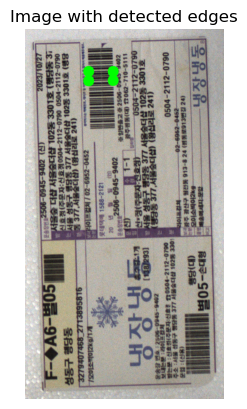

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 75, 200)
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            return approx
    return None

# 테스트 이미지 로드
image = cv2.imread('crops/invoice/CAM 20231028071857_1.jpg')
edges = find_document_edges(image)

if edges is not None:
    for point in edges:
        cv2.circle(image, tuple(point[0]), 15, (0, 255, 0), -1)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.imshow(image)
plt.title("Image with detected edges")
plt.axis('off')  # 축을 숨깁니다.
plt.show()

## 컨투어링 결과 확인하기

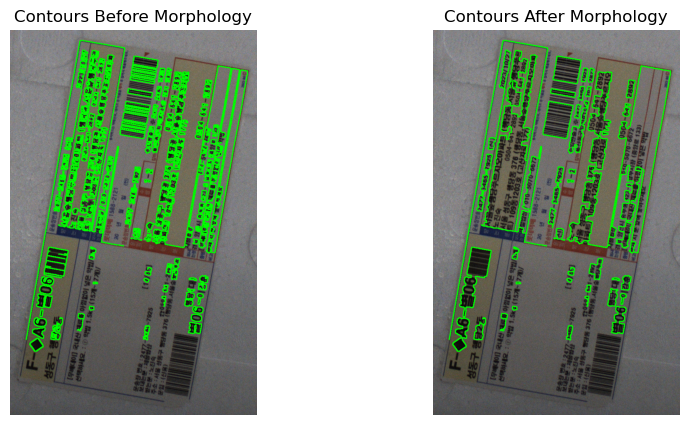

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 캐니 에지 검출
    edged = cv2.Canny(gray, 75, 200)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    # 모폴로지 변환 전후의 컨투어 찾기
    contours_before, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_after, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours_before, contours_after

def draw_contours(image, contours):
    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028072043_1.jpg'
image = cv2.imread(image_path)

# 이미지 로드 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

contours_before, contours_after = find_document_edges(image)

# 원본 이미지에 컨투어 그리기 (모폴로지 변환 전후)
output_before = draw_contours(image, contours_before)
output_after = draw_contours(image, contours_after)

# 컨투어가 그려진 이미지를 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Contours Before Morphology')
plt.imshow(cv2.cvtColor(output_before, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours After Morphology')
plt.imshow(cv2.cvtColor(output_after, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


## cany에지 검출 확인 및 최적값 찾기

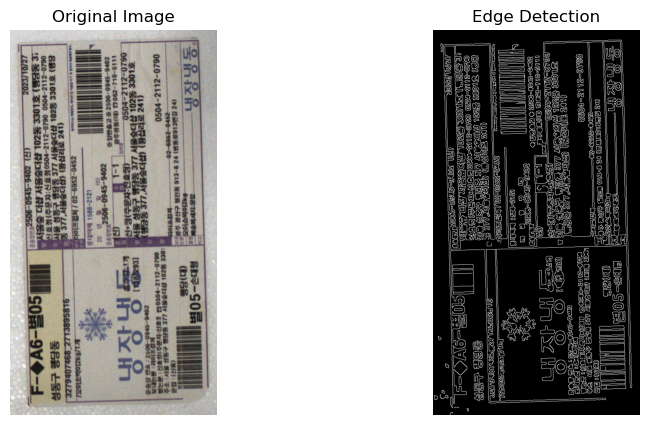

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 70, 140)
    return edged

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

# 이미지 로드 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

edges = find_document_edges(image)

# 원본 이미지와 에지 검출 이미지를 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


## 보완 1)모폴로지 변환을 통해 불필요한 에지 줄이기

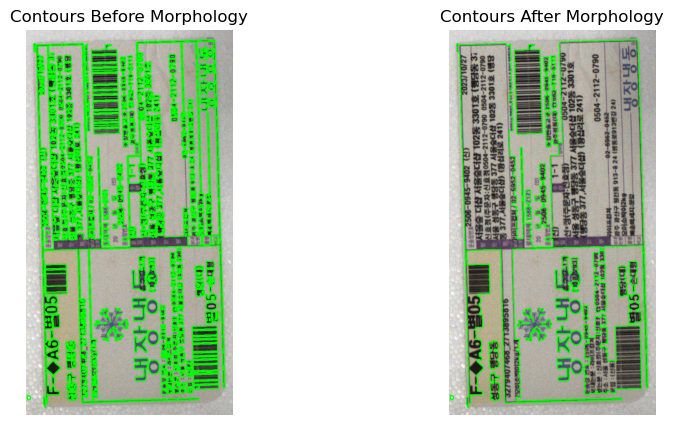

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 캐니 에지 검출
    edged = cv2.Canny(gray, 75, 200)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    # 모폴로지 변환 전후의 컨투어 찾기
    contours_before, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_after, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours_before, contours_after

def draw_contours(image, contours):
    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

# 이미지 로드 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

contours_before, contours_after = find_document_edges(image)

# 원본 이미지에 컨투어 그리기 (모폴로지 변환 전후)
output_before = draw_contours(image, contours_before)
output_after = draw_contours(image, contours_after)

# 컨투어가 그려진 이미지를 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Contours Before Morphology')
plt.imshow(cv2.cvtColor(output_before, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours After Morphology')
plt.imshow(cv2.cvtColor(output_after, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


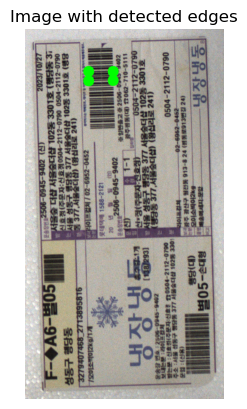

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 캐니 에지 검출
    edged = cv2.Canny(gray, 75, 200)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            return approx
    return None

# 테스트 이미지 로드
image = cv2.imread('crops/invoice/CAM 20231028071857_1.jpg')
edges = find_document_edges(image)

if edges is not None:
    for point in edges:
        cv2.circle(image, tuple(point[0]), 15, (0, 255, 0), -1)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.imshow(image)
plt.title("Image with detected edges")
plt.axis('off')  # 축을 숨깁니다.
plt.show()

## 보완2) 명확한 에지 검출을 위해 sobel 미분 마스크 크기 조정

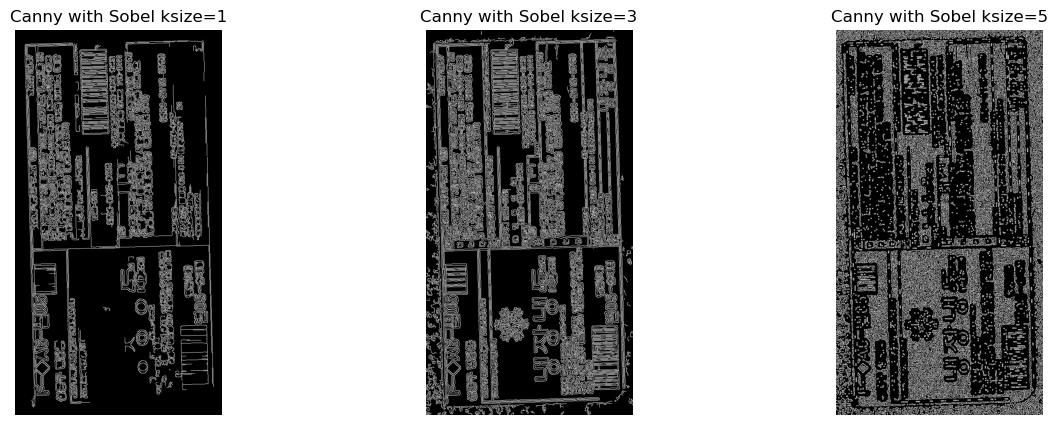

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image, ksize):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Sobel 에지 검출
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # 에지 강도 계산
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # 에지 강도를 8비트 정수형으로 변환
    grad_magnitude = cv2.convertScaleAbs(grad_magnitude)
    
    return grad_magnitude

def canny_with_sobel(image, ksize):
    # Sobel 에지 검출
    sobel_edges = sobel_edge_detection(image, ksize)
    
    # 캐니 에지 검출
    edged = cv2.Canny(sobel_edges, 75, 200)
    return edged

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

# Sobel 마스크 크기별 결과
ksizes = [1, 3, 5]
results = [canny_with_sobel(image, ksize) for ksize in ksizes]

# 결과 시각화
plt.figure(figsize=(15, 5))

for i, ksize in enumerate(ksizes):
    plt.subplot(1, len(ksizes), i+1)
    plt.title(f'Canny with Sobel ksize={ksize}')
    plt.imshow(results[i], cmap='gray')
    plt.axis('off')

plt.show()


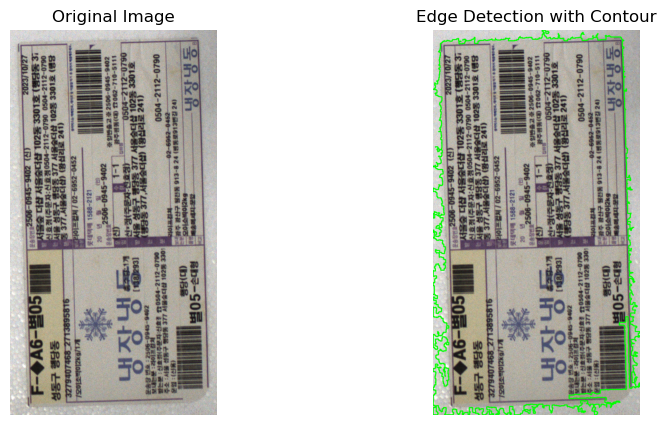

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image, ksize):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Sobel 에지 검출
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # 에지 강도 계산
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # 에지 강도를 8비트 정수형으로 변환
    grad_magnitude = cv2.convertScaleAbs(grad_magnitude)
    
    return grad_magnitude

def find_document_edges(image):
    # 그레이스케일 변환
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    #gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    sobel_edges = sobel_edge_detection(image, 3)
    
    # 캐니 에지 검출
    edged = cv2.Canny(sobel_edges, 80, 150)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    # 컨투어 찾기
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 가장 큰 컨투어(테두리)를 찾음
    if contours:
        contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        return contour
    else:
        return None

def draw_contour(image, contour):
    # 원본 이미지에 컨투어 그리기
    output = image.copy()
    if contour is not None:
        cv2.drawContours(output, [contour], -1, (0, 255, 0), 2)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

#20231028071256_2 잘 수행되는 거
#20231028071857_1 잘 수행 안되는 거

# 이미지 로드 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

contour = find_document_edges(image)
output_image = draw_contour(image, contour)

# 원본 이미지와 에지 검출 이미지를 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection with Contour')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()




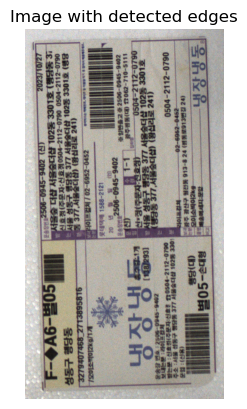

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_edge_detection(image, ksize):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Sobel 에지 검출
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # 에지 강도 계산
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # 에지 강도를 8비트 정수형으로 변환
    grad_magnitude = cv2.convertScaleAbs(grad_magnitude)
    
    return grad_magnitude

def find_document_edges(image):
    # 그레이스케일 변환
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    #gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    sobel_edges = sobel_edge_detection(image, 3)
    
    # 캐니 에지 검출
    edged = cv2.Canny(sobel_edges, 80, 150)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    # 컨투어 찾기
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 가장 큰 컨투어(테두리)를 찾음
    if contours:
        contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]
        
        # 컨투어 근사화
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        
        # 근사화된 컨투어가 사각형(꼭짓점 4개)인 경우 반환
        if len(approx) == 4:
            return approx
        else:
            return None
    else:
        return None

# 테스트 이미지 로드
image = cv2.imread('crops/invoice/CAM 20231028071857_1.jpg')
edges = find_document_edges(image)

if edges is not None:
    for point in edges:
        cv2.circle(image, tuple(point[0]), 15, (0, 255, 0), -1)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.imshow(image)
plt.title("Image with detected edges")
plt.axis('off')  # 축을 숨깁니다.
plt.show()


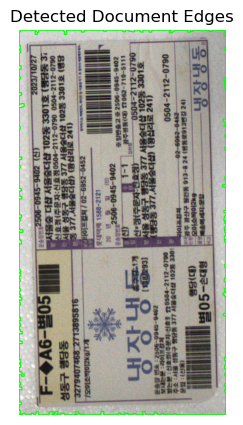

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(image):
    # CLAHE (Contrast Limited Adaptive Histogram Equalization) 적용
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def find_document_edges(image):
    # 이미지 대비 향상
    enhanced_image = enhance_contrast(image)
    
    # 그레이스케일 변환
    gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 적응형 임계처리 적용
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # 반전
    adaptive_thresh = cv2.bitwise_not(adaptive_thresh)
    
    # 모폴로지 변환을 통해 더 명확한 에지를 얻음
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)
    
    # 모든 컨투어 찾기
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours

def draw_contours(image, contours):
    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

# 이미지 로드 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")

contours = find_document_edges(image)
output_image = draw_contours(image, contours)

# 컨투어가 그려진 이미지를 출력
plt.figure(figsize=(10, 5))

plt.title('Detected Document Edges')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


## 보완 3) 기존 canny 검출기를 사용하되 canny 검출기 성능 높이기 시도

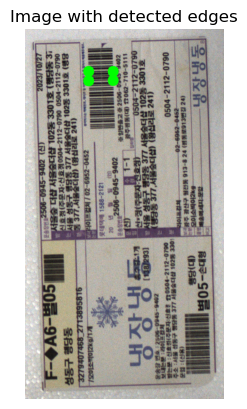

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 75, 200)
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 0.005:  # 필요에 따라 면적 임계값 조정
            continue
        
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            return approx
    
    return None

# 테스트 이미지 로드
image = cv2.imread('crops/invoice/CAM 20231028071857_1.jpg')
edges = find_document_edges(image)

if edges is not None:
    for point in edges:
        cv2.circle(image, tuple(point[0]), 15, (0, 255, 0), -1)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.imshow(image)
plt.title("Image with detected edges")
plt.axis('off')  # 축을 숨깁니다.
plt.show()


### 3-1) 이미지 대비 향상

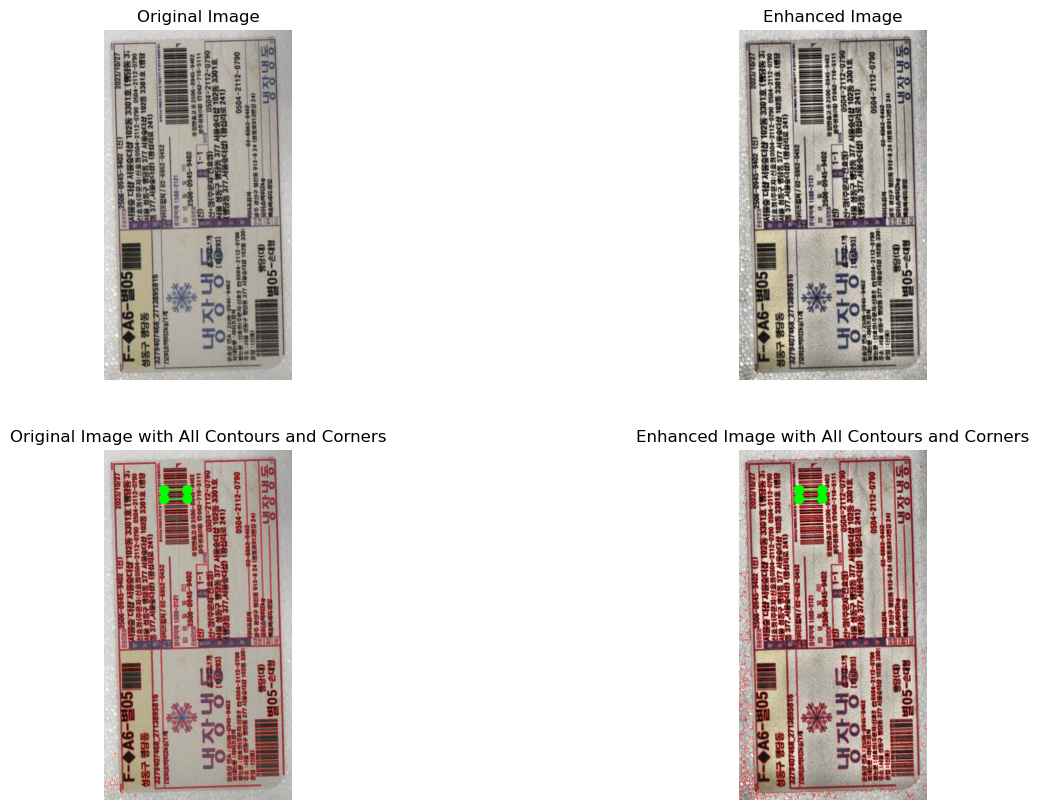

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(15, 15))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 75, 150)
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    approx_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 1000:  # 필요에 따라 면적 임계값 조정
            continue
        
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            approx_contour = approx
            break
    
    return contours, approx_contour

# 컨투어와 네 모서리 점을 그리는 함수
def draw_contours_and_corners(image, all_contours, final_contour):
    output = image.copy()
    # 모든 컨투어 그리기
    cv2.drawContours(output, all_contours, -1, (0, 0, 255), 1)
    # 최종 컨투어와 모서리 점 그리기
    if final_contour is not None:
        cv2.drawContours(output, [final_contour], -1, (0, 255, 0), 2)
        for point in final_contour:
            cv2.circle(output, tuple(point[0]), 15, (0, 255, 0), -1)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)
enhanced_image = enhance_contrast(image)

# 원본 이미지에서 에지 검출
contours_original, edges_original = find_document_edges(image)
original_with_contours = draw_contours_and_corners(image, contours_original, edges_original)

# 대비 향상된 이미지에서 에지 검출
contours_enhanced, edges_enhanced = find_document_edges(enhanced_image)
enhanced_with_contours = draw_contours_and_corners(enhanced_image, contours_enhanced, edges_enhanced)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
original_with_contours = cv2.cvtColor(original_with_contours, cv2.COLOR_BGR2RGB)
enhanced_with_contours = cv2.cvtColor(enhanced_with_contours, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(original_with_contours)
plt.title("Original Image with All Contours and Corners")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(enhanced_with_contours)
plt.title("Enhanced Image with All Contours and Corners")
plt.axis('off')

plt.show()


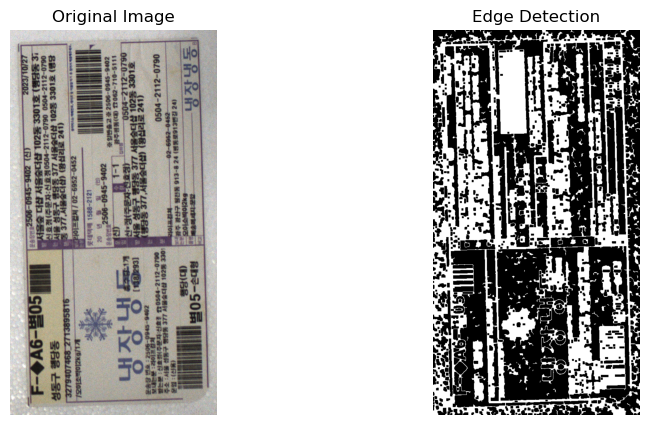

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 50, 100)
    
    # 모폴로지 변환을 통해 불필요한 에지를 줄임
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    return closed

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)

# 이미지 대비 향상
enhanced_image = enhance_contrast(image)

# 에지 검출 및 모폴로지 변환
edges = find_document_edges(enhanced_image)

# 원본 이미지와 에지 검출 이미지를 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


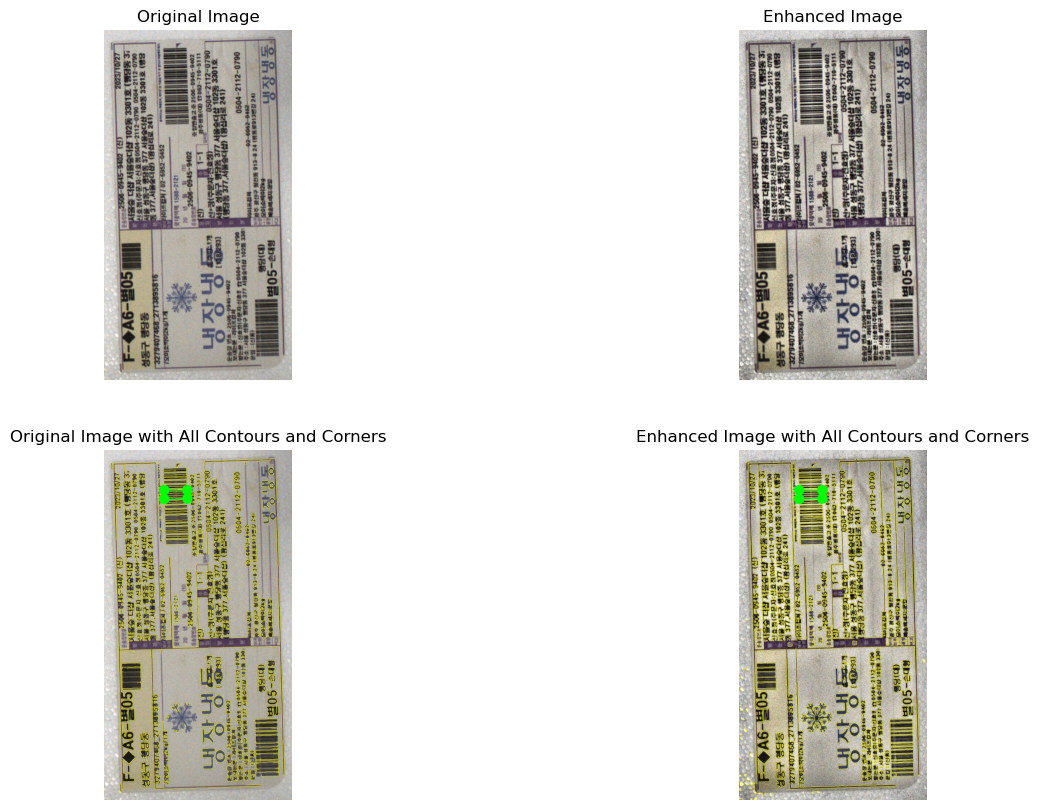

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(15, 15))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv2.Canny(image, lower, upper)

def find_document_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = auto_canny(gray)
    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    approx_contour = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 1000:  # 필요에 따라 면적 임계값 조정
            continue
        
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            approx_contour = approx
            break
    
    return contours, approx_contour

# 컨투어와 네 모서리 점을 그리는 함수
def draw_contours_and_corners(image, all_contours, final_contour):
    output = image.copy()
    # 모든 컨투어 그리기
    cv2.drawContours(output, all_contours, -1, (0, 255, 255), 1)
    # 최종 컨투어와 모서리 점 그리기
    if final_contour is not None:
        cv2.drawContours(output, [final_contour], -1, (0, 255, 0), 2)
        for point in final_contour:
            cv2.circle(output, tuple(point[0]), 15, (0, 255, 0), -1)
    return output

# 테스트 이미지 로드
image_path = 'crops/invoice/CAM 20231028071857_1.jpg'
image = cv2.imread(image_path)
enhanced_image = enhance_contrast(image)

# 원본 이미지에서 에지 검출
contours_original, edges_original = find_document_edges(image)
original_with_contours = draw_contours_and_corners(image, contours_original, edges_original)

# 대비 향상된 이미지에서 에지 검출
contours_enhanced, edges_enhanced = find_document_edges(enhanced_image)
enhanced_with_contours = draw_contours_and_corners(enhanced_image, contours_enhanced, edges_enhanced)

# 이미지를 BGR에서 RGB로 변환 (matplotlib는 RGB 형식을 사용)
original_with_contours = cv2.cvtColor(original_with_contours, cv2.COLOR_BGR2RGB)
enhanced_with_contours = cv2.cvtColor(enhanced_with_contours, cv2.COLOR_BGR2RGB)

# 이미지를 matplotlib를 사용하여 표시
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(original_with_contours)
plt.title("Original Image with All Contours and Corners")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(enhanced_with_contours)
plt.title("Enhanced Image with All Contours and Corners")
plt.axis('off')

plt.show()
